<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''SELECT 
                    COUNT(id)
                FROM public.vacancies
'''

In [5]:
# результат запроса
vacancies = pd.read_sql_query(query_3_1, connection)
vacancies

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\2754895936.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''SELECT 
                     COUNT(id)
                FROM public.employers
'''

In [7]:
# результат запроса
employers = pd.read_sql_query(query_3_2, connection)
employers

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\1389401573.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''SELECT 
                     COUNT(id)
                FROM public.areas
'''

In [9]:
# результат запроса
areas = pd.read_sql_query(query_3_3, connection)
areas

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\744816049.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''SELECT 
                     COUNT(id)
                FROM public.industries
'''

In [11]:
# результат запроса
industries = pd.read_sql_query(query_3_4, connection)
industries

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\2016089628.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industries = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

### выводы по предварительному анализу данных
В базе данных представлены:
+ количество вакансий: 49197
+ количество работодателей: 23501
+ количество регионов (городов): 1362
+ количество сфер деятельности: 294
  
Количество вакансий вдвое превосходит количество работодателей, соответсвенно какие-то работодатели выкладывают несколько вакансий, которые зарегистрированы в 1362 населенных пунктах. На 2021 год в России насчитывалось 1117 городов, поэтому некоторые вакансии могут быть из населенных пунктов другого типа, либо это зарубежные вакансии, тем неменее база данных охватывает все города России. Количество сфер деятельности небольшое, возможно это связано с тем, что они достаточно широко сформулированы и могут иметь несколько направлений.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f'''SELECT
                    DISTINCT a.name AS area,
                    COUNT(v.id) AS cnt
                FROM public.vacancies AS v
                JOIN public.areas AS a ON v.area_id = a.id
                GROUP BY a.name
                ORDER BY cnt DESC
'''

In [13]:
# результат запроса
vacancies_cnt = pd.read_sql_query(query_4_1, connection)
vacancies_cnt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\3980259606.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_cnt = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Шушары,1
765,Электроугли,1
766,Эртиль,1
767,Юрга,1


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


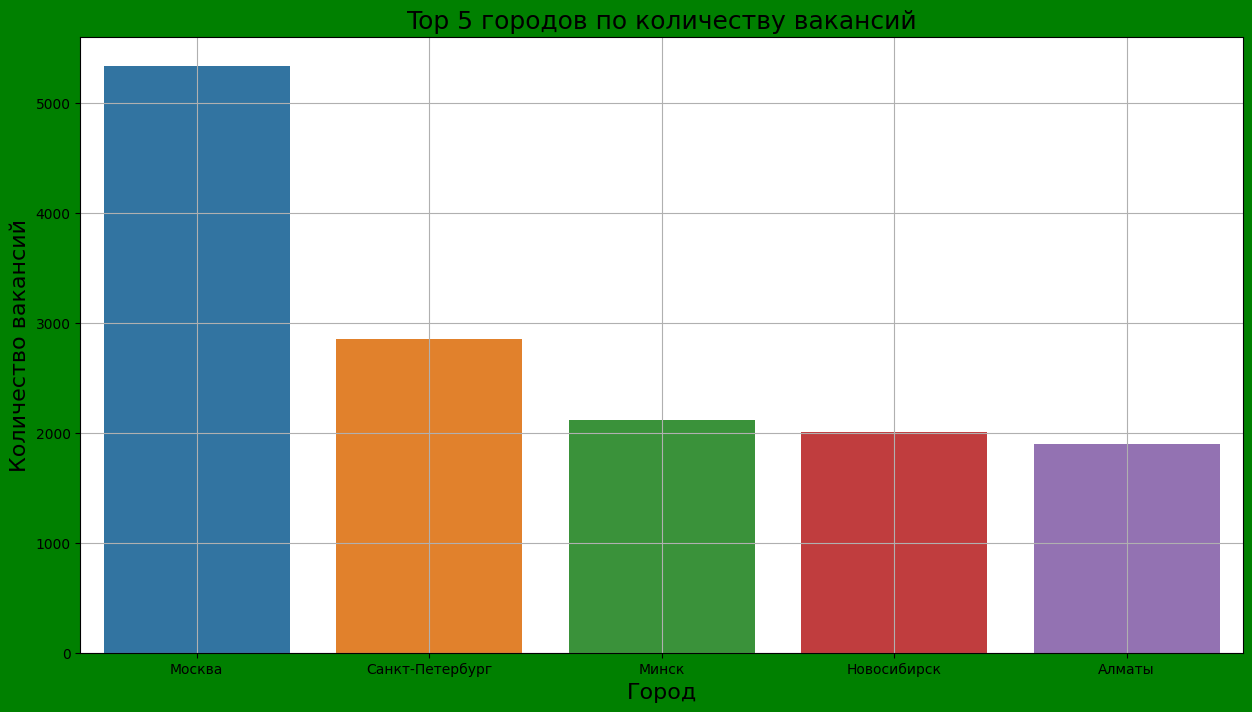

In [14]:
# Пятерка лидеров по количеству вакансий
display(vacancies_cnt.head())

# Построим график "Top 5 городов по количеству вакансий"
fig = plt.figure(figsize=(15, 8), facecolor='green')
barplot = sns.barplot(
    data = vacancies_cnt.head(),
    x='area',
    y='cnt'    
)
# Название графика
barplot.set_title('Top 5 городов по количеству вакансий', fontsize=18)
# Признак по оси х
barplot.set_xlabel('Город', fontsize=16)
# Признак по оси у
barplot.set_ylabel('Количество вакансий', fontsize=16)
# Сетка
barplot.grid()

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_4_2 = f'''SELECT
                    COUNT(id)
                FROM public.vacancies                
                WHERE salary_from IS NOT NULL or salary_to IS NOT NULL    
'''

In [16]:
# результат запроса
salary = pd.read_sql_query(query_4_2, connection)
salary

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\3311651010.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary = pd.read_sql_query(query_4_2, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_4_3 = f'''SELECT 
                     ROUND(AVG(salary_from))::integer AS salary_from_avg,
                     ROUND(AVG(salary_to))::integer AS salary_to_avg  
                FROM public.vacancies             
'''

In [18]:
# результат запроса
salary_min_max = pd.read_sql_query(query_4_3, connection)
salary_min_max

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\1030367914.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_min_max = pd.read_sql_query(query_4_3, connection)


,salary_from_avg,salary_to_avg
0,71065,110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query_4_4 = f'''
            SELECT DISTINCT
                schedule,
                employment,
                COUNT(id) AS id_cnt
            FROM public.vacancies 
            GROUP BY schedule, employment
            ORDER BY id_cnt DESC                
'''

In [20]:
# результат запроса
schedule = pd.read_sql_query(query_4_4, connection)
schedule

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\1373436183.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule = pd.read_sql_query(query_4_4, connection)


,schedule,employment,id_cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_4_5 = f'''
            SELECT 
                experience,
                COUNT(id) AS id_cnt
            FROM public.vacancies
            GROUP BY experience
            ORDER BY id_cnt                
'''

In [22]:
# результат запроса
experience = pd.read_sql_query(query_4_5, connection)
experience

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\3054466674.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  experience = pd.read_sql_query(query_4_5, connection)


,experience,id_cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### выводы по детальному анализу вакансий
В пятерке городов-лидеров по количеству вакансий  наблюдается большой разброс значений. Лидирующую позицию занимает Москва - 5333 вакансии. Замыкает пятерку Алматы - 1892 вакансии. Связано это с достаточно обширным рынком труда в Москве и спросом на вакансии в этом городе. На втором месте Санкт-Петербург, но количество вакансий здесь почти в 2 раза ниже - 2851. Это связано с большим количеством работодателей в Москве. Примерно на одном уровне завершающая тройка - Минск, Новосибирск, Алматы. Новосибирск входит в число городов-миллионников, в которых достаточно большое количество вакансий. Минск и Алматы подтверждают наличие на сайте вкакнсий из стран ближнего зарубежья. Возможно hh, в первую очередь, все-таки рассчитан на кандидатов из других стран и предлагает вакансии по России, но и дает возможность для поиска работы внутри своей страны.

Из 49197 вакансий заполнено хотя бы одно из полей с зарплатой у 24073 - это около половины. Часто работодатели указывают только стартовую границу зарплаты. Однако, значительное количество вакансий без указаний зарплаты. Отчасти это может быть связано с тем, что не все организации стремятся публиковать даже примерные зарплаты своих сотрудников. С дргуой стороны, если не говорить о бюджетной сфере, где с формированием зарплаты более строго, то, вероятно, работодатели нацелены более гибко подходить к вопросу зарплаты. Ее уровень может определяться в ходе собеседования, исходя из квалификации, личностных и профессиональных характеристик специалиста, иногда и из его пожеланий. Видимо больше вакансий с закрытой информации о зарплате у высококвалифицированных специалистов, специалистов с большим опытом и на руководящие должности.

Среднее значение для нижней границы зарплаты - 71 065 руб., а для верхней - 110 537 руб. Средняя зарплата в России за 2021 год - 57 244 руб. а за 1-3 кварталы 2022 г. - в границах 60 - 63 тыс. руб. Нижняя граница зарплатной вилки находится чуть выше среднего значения по России, однако, это может быть связано с большим разбросом средней зарплаты по регионам РФ. Зарплатная вилка формируется при исследоввании рынка труда, имеет значение конкурентоспособность зарплаты, зарплата на аналогичных должностях в других компаниях и ожидаемая зарплата соискателей. Можно также предположить, что средняя ожидаемая зарплата соискателей находится таже в районе нижней границы, а соответственно немного выше средней зарплаты по России. На верхнюю границу, видимо, больше влияют профессиональные и личные качества конкретного соискателя.

Работодателями предлагаются разнообразные сочетаний типов рабочего графика и типов трудоустройства. Значительная часть вакансий предлагает полную занятость. На первом месте с большим отрывом "полный день - полная занятость" - 35367 вакансий, на второй позиции "удаленная работа - полная занятость" - 7802 вакансии. С точки зрения соискателей полная занятость может быть не всегда удобна, а с точки зрения работодателя ей отдается предпочтение. Для сотрудников на полной занятости проще планировать и распределять работу. Тот же объем работы может быть выполнен меньшим количеством сотрудников, если они работают полный день. Также на качество работы влияет если какой-то проект ведет один сотрудник или одна группа.

Небольшое количество вакансий по стажировкам, видимо, этот тип трудоустройства не имеет большого развития в России. Проектная работа также в последних рядах по количеству вакансий, потому что предполагает найм специалиста для выполнения какого-то определенного проекта. И как показано в таблице крайне редко стажирока и проектная работа сочетаются со сменным, гибким графиком и вахтовым методом.

Важным показателем для работодателя является опыт работы соискателя. С помощью опыта работы можно свободно проследить карьерный рост специалиста, его достижения и профессиональные успехи. Если говорить о какой-то конкретной должности, то работодателей больше всего интересует опыт работы от 1 года до 3 лет: 26152 вакансии, затем от 3 до 6 лет: 14511 вакансий. Опыт 1-3 года достаточен для того, чтобы специалист освоился в профессии, научился самостоятельно выполнять определенные задачи, анализировать свою работу. Но возможно, не успел уйти в какую-то узкую специализацию, которой занимается конкретная организация. Так как в работе на похожих должностях в разных компаниях будут свои отличия и сотрудника все-равно придется чему-то обучать. Не менее важным для работодателя может являться, то что у сотрудников в этой категории опыта зарплатные ожидания меньше, чем у специалистов с опытом от 3 лет, которые в ряде сфер уже могут претендовать на более высокие или руководящие должности, с более высокой зарплатой.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [23]:
# текст запроса
query_5_1 = f'''
             SELECT
                 e.name,
                 COUNT(v.id)             
             FROM public.employers AS e
             JOIN public.vacancies AS v 
             ON e.id = v.employer_id
             GROUP BY e.name
             ORDER BY count DESC             
'''

In [24]:
# результат запроса
employers = pd.read_sql_query(query_5_1, connection)
employers

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\4229143537.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers = pd.read_sql_query(query_5_1, connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
...,...,...
14761,им. Тьюринга,1
14762,LLC Novalab Tech,1
14763,Компания Мир упаковки,1
14764,Лифинцев Олег Иванович,1


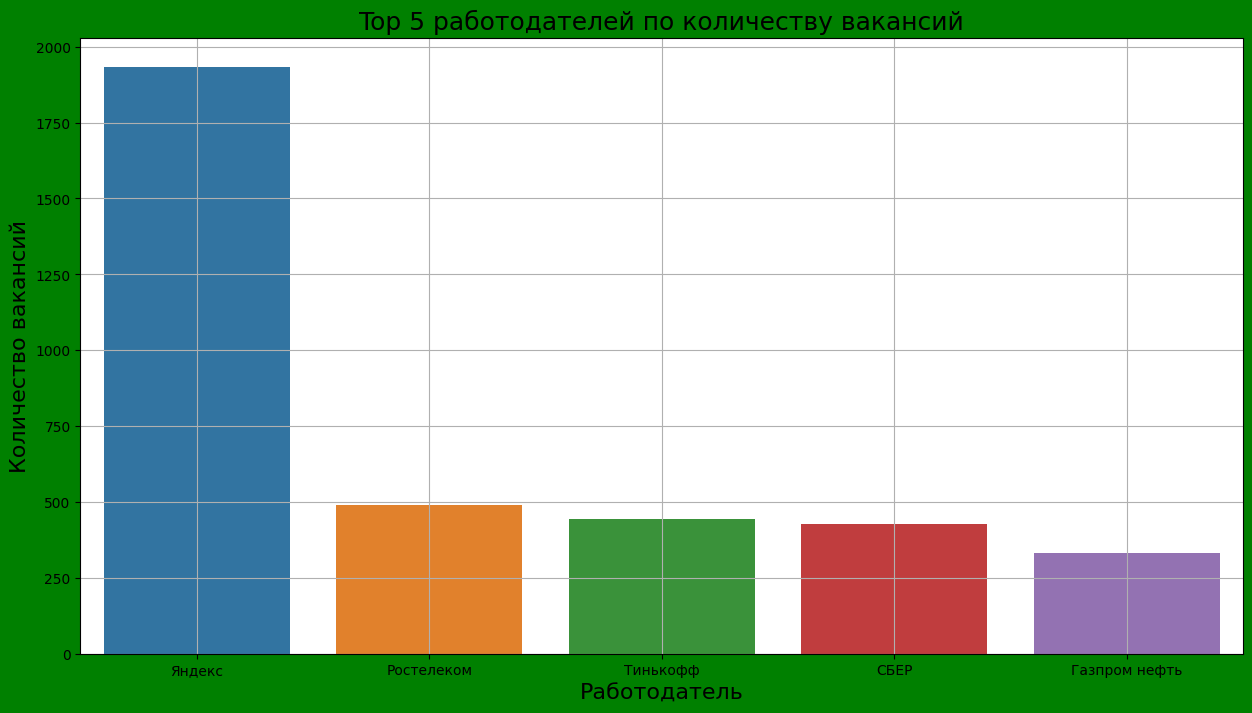

In [25]:
fig = plt.figure(figsize=(15, 8), facecolor='green')
barplot = sns.barplot(
    data=employers.head(),
    x='name',
    y='count'
)
# Название графика
barplot.set_title('Top 5 работодателей по количеству вакансий', fontsize=18)
# Признак по оси х
barplot.set_xlabel('Работодатель', fontsize=16)
# Признак по оси у
barplot.set_ylabel('Количество вакансий', fontsize=16)
# Сетка
barplot.grid()

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# текст запроса
query_5_2 = f''' 
            SELECT
                a.name AS area,
                COUNT(e.id) AS employers_cnt,
                COUNT(v.id) AS vacancies_cnt
            FROM public.areas AS a 
            LEFT JOIN public.employers AS e ON a.id = e.area
            LEFT JOIN public.vacancies AS v ON a.id = v.area_id
            GROUP BY a.name
            HAVING COUNT(v.id) = 0 
            ORDER BY  employers_cnt DESC
            LIMIT 1
'''

In [27]:
employers_area = pd.read_sql_query(query_5_2, connection)
employers_area

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\2212862898.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_area = pd.read_sql_query(query_5_2, connection)


,area,employers_cnt,vacancies_cnt
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса
query_5_3 = f''' 
            SELECT
                DISTINCT e.name AS employer,
                COUNT(DISTINCT v.area_id) AS vacaicies_area_cnt
            FROM public.employers AS e
            JOIN public.vacancies AS v 
            ON e.id = v.employer_id
            GROUP BY employer
            ORDER BY vacaicies_area_cnt DESC
'''

In [29]:
# результат запроса
vacancies_area = pd.read_sql_query(query_5_3, connection)
vacancies_area

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\1191270987.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_area = pd.read_sql_query(query_5_3, connection)


,employer,vacaicies_area_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,Яроцкий Е. В./ MoonX,1
14762,Ясли-сад №374 г. Минска,1
14763,ЯСП,1
14764,Ястро-Переработка,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
# текст запроса
query_5_4 = f''' 
            SELECT
                COUNT(e.name) 
            FROM public.employers AS e 
            FULL JOIN public.employers_industries AS ei ON e.id = ei.employer_id
            WHERE ei.industry_id IS NULL 
'''

In [31]:
# результат запроса
employers_with_null_industry = pd.read_sql_query(query_5_4, connection)
employers_with_null_industry

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\2777858357.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_with_null_industry = pd.read_sql_query(query_5_4, connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
# текст запроса 
query_5_5 = f''' 
            SELECT
                e.name AS name,
                COUNT(ei.industry_id) AS industry 
            FROM public.employers AS e 
            JOIN public.employers_industries AS ei ON e.id = ei.employer_id
            GROUP BY e.name 
            HAVING COUNT(ei.industry_id) = 4 
            ORDER BY name 
            OFFSET 2
            LIMIT 1 
'''

In [33]:
# результат запроса
employers_with_4_industry = pd.read_sql_query(query_5_5, connection)
employers_with_4_industry

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\2345257539.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_with_4_industry = pd.read_sql_query(query_5_5, connection)


,name,industry
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса
query_5_6 = f''' 
            SELECT
                COUNT(e.name) AS develop_cnt
            FROM public.employers AS e 
            JOIN public.employers_industries AS ei ON e.id = ei.employer_id
            JOIN public.industries AS i ON ei.industry_id = i.id
            GROUP BY i.name
            HAVING i.name = 'Разработка программного обеспечения'
'''

In [35]:
# результат запроса
employers_industry_development = pd.read_sql_query(query_5_6, connection)
employers_industry_development

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\2520767614.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_industry_development = pd.read_sql_query(query_5_6, connection)


,develop_cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D0%BE%D0%B2'
data = pd.read_html(url)
city_df = data[1]
city_list = list(city_df['Город'])
city_list[13] = 'Воронеж'
city_list

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [37]:
# текст запроса
query_5_7 = f'''
             SELECT 
             a.name as name,
             COUNT (v.id) as cnt
             FROM public.vacancies v
             JOIN public.employers e on e.id = v.employer_id 
             AND e.name = 'Яндекс'
             JOIN public.areas a on a.id = v.area_id
             AND a.name in {tuple(city_list)}
             GROUP BY a.name
             UNION ALL
             SELECT
             'Total',
             COUNT(*)
             FROM public.vacancies v
             JOIN public.employers e on e.id = v.employer_id
             AND e.name = 'Яндекс'
             JOIN public.areas a on a.id = v.area_id
             AND a.name in {tuple(city_list)}
             ORDER BY cnt
'''

In [38]:
# результат запроса
yandex_area = pd.read_sql_query(query_5_7, connection)
yandex_area

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\4227722936.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yandex_area = pd.read_sql_query(query_5_7, connection)


,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


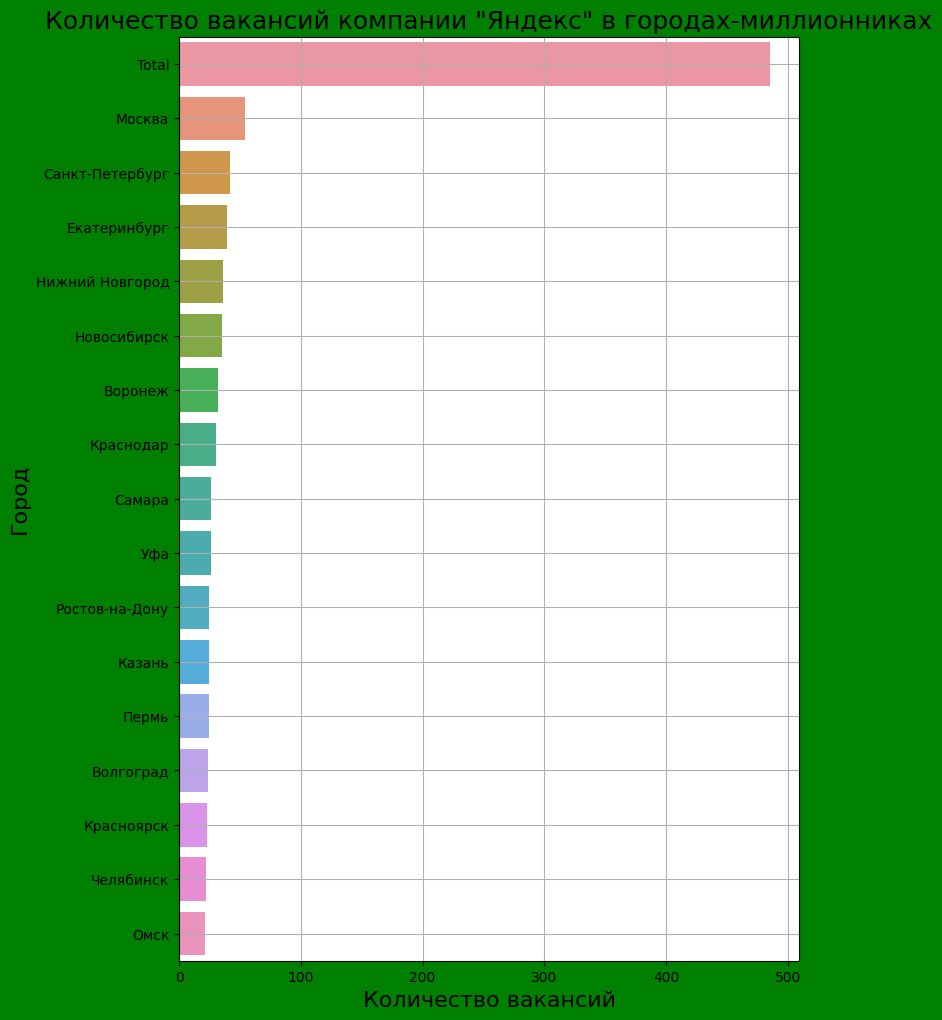

In [39]:
fig = plt.figure(figsize=(8, 12), facecolor='green')
barplot = sns.barplot(
    data = yandex_area.sort_values(by='cnt', ascending=False),
    x='cnt',
    y='name',
    orient='h'
)
# Название графика
barplot.set_title('Количество вакансий компании "Яндекс" в городах-миллионниках', fontsize=18)
# Признак по оси х
barplot.set_xlabel('Количество вакансий', fontsize=16)
# Признак по оси у
barplot.set_ylabel('Город', fontsize=16)
# Сетка
barplot.grid()

***

### выводы по анализу работодателей
В первую пятерку работодалелей по количеству вакансий выходят: Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть. Представленные компании достаточно крупные, имеют обширную сеть филиалов, поэтому они лидируют по количеству вакансий. Яндекс и СБЕР занчительно расширяют сферу деятельности, им требуется большое количество специалистов разного профиля. Яндекс лидирует со значительным отрывом. Это связано как с необходимостью в большом количестве сотрудников в разных направлениях деятельности компании, так и, вероятно, с частой сменой сотрудников.

По количеству регионов, в которых компании публикуют свои вакансии лидирует Яндекс, вторую позицию удерживает Ростелеком. Опять же это связано с обширной географией деятельности компаний. Чуть больший отрыв у Спецремонта. Остальные работодатели значительно отстают по данному показателю.

У 8419 работодателей не указана сфера деятельности. С одной стороны, это может быть связано с тем, что вакансия не имеет четкой специализации, а с другой для того чтобы вакансия чаще появлялась в поисковике.

Из 49197 вакансий разработка программного обеспечения в качестве сферы деятельности указана у 3553 работодателей.



# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [40]:
# текст запроса
query_6_1 = f''' 
            SELECT
                name
            FROM public.vacancies
            WHERE LOWER(name) LIKE '%data%'
                  OR LOWER(name) LIKE '%данн%'            
'''

In [41]:
# результат запроса
data_vacancies = pd.read_sql_query(query_6_1, connection)
data_vacancies

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\2935617630.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_vacancies = pd.read_sql_query(query_6_1, connection)


,name
0,Аналитик хранилищ данных и BI-систем/Аналитик ...
1,Data-analysts (удаленно)
2,Стажер Data Engineer/Data Аналитик в команду Б...
3,Старший специалист хранилищ данных
4,Администратор баз данных и сетей
...,...
1766,Программист Delphi / разработчик баз данных
1767,Разработчик баз данных (Big Data)
1768,Аналитик данных
1769,Data аналитик /Аналитик BI (удаленно)


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [42]:
# текст запроса
query_6_2 = f''' 
            SELECT
                COUNT(name)
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                       OR name ILIKE '%data science%'
                       OR name ILIKE '%исследователь данных%'
                       OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                       OR name ILIKE '%machine learning%'
                       OR name ILIKE '%машинн%обучен%%')
                       AND (name ILIKE '%junior%'
                       OR experience ILIKE '%Нет опыта%'
                       OR employment ILIKE '%Стажировка%')                                     
'''

In [43]:
# результат запроса
data_vacancies = pd.read_sql_query(query_6_2, connection)
data_vacancies

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\1248853789.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_vacancies = pd.read_sql_query(query_6_2, connection)


,count
0,51


In [44]:
data_vacancies.value_counts()

count
51       1
dtype: int64

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [45]:
# текст запроса
query_6_3 = f''' 
            SELECT
                COUNT(name)
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                       OR name ILIKE '%data science%'
                       OR name ILIKE '%исследователь данных%'
                       OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                       OR name ILIKE '%machine learning%'
                       OR name ILIKE '%машинн%обучен%%')
                       AND (key_skills LIKE '%SQL%'
                       OR key_skills ILIKE '%postgres%')                       
'''


In [46]:
# результат запроса
sql_vacancieas = pd.read_sql_query(query_6_3, connection)
sql_vacancieas

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\2529712158.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_vacancieas = pd.read_sql_query(query_6_3, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [47]:
# текст запроса
query_6_4 = f''' 
            SELECT
                COUNT(name)
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                       OR name ILIKE '%data science%'
                       OR name ILIKE '%исследователь данных%'
                       OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                       OR name ILIKE '%machine learning%'
                       OR name ILIKE '%машинн%обучен%%')
                       AND key_skills ILIKE '%python%'                    
'''

In [48]:
# результат запроса
python_vacancieas = pd.read_sql_query(query_6_4, connection)
python_vacancieas

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\2420966330.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  python_vacancieas = pd.read_sql_query(query_6_4, connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [49]:
# текст запроса
query_6_5 = f''' 
            SELECT
                ROUND(AVG(LENGTH(key_skills)-LENGTH(REPLACE(key_skills, CHR(9), ''))+1), 2)
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                       OR name ILIKE '%data science%'
                       OR name ILIKE '%исследователь данных%'
                       OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                       OR name ILIKE '%machine learning%'
                       OR name ILIKE '%машинн%обучен%%')
                       AND (key_skills IS NOT NULL)
'''

In [50]:
key_skills_avg = pd.read_sql_query(query_6_5, connection)
key_skills_avg

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\402634427.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  key_skills_avg = pd.read_sql_query(query_6_5, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [51]:
# текст запроса
query_6_6 = f''' 
            SELECT
                COUNT(*), experience, AVG((COALESCE(salary_from, salary_to)+COALESCE(salary_to, salary_from))/2)::int
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                       OR name ILIKE '%data science%'
                       OR name ILIKE '%исследователь данных%'
                       OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                       OR name ILIKE '%machine learning%'
                       OR name ILIKE '%машинн%обучен%%')
                       AND ((salary_from IS NOT NULL) OR (salary_to IS NOT NULL))
                       GROUP BY experience
'''

In [52]:
# результат запроса
salary_ds_avg = pd.read_sql_query(query_6_6, connection)
salary_ds_avg

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13284\944841124.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_ds_avg = pd.read_sql_query(query_6_6, connection)


,count,experience,avg
0,7,Нет опыта,74643
1,28,От 1 года до 3 лет,139675
2,27,От 3 до 6 лет,243115


***

# выводы по предметному анализу
Из 49197 вакансий 1771 вакансия имеет отношение к данным. Однако, для data science junior подходит всего 51 вакансия. Что говорит о востребованности на рыкне специалистов middle и senior. Скорее всего, это связано с желанием работодателя получать сразу опытного специалиста, а не тратить время на обучение сотрудника без опыта. Кроме того, в данной сфере высокая текучесть кадров и с получением опыта 1-3 года работник с большой долей вероятности уйдет из компании. 

У 201 вакансии в качестве ключевого навыка указаны SQL и  PostgreSQL. Это говорит о востребованности навыка работы с базами данных. В свою очередь Python  указан 351 вакансии. Это связано с тем, что он больше подходит для работы с данными и машинного обучения и с тем, что в России мало распространен язык R.

Средняя зарплата для специалистов data science имеет большой разброс в зависимости от опыта. У специалистов без опыта она 74 643 руб., от 1 до 3 лет 139 675 руб., от 3 до 6 лет 243 115 руб. На каждом этапе опыта зарплата увеличивается почти в 2 раза. Это, конечно, связано и со сложностью задач, которые решают опытные специалисты, и, опять же, частый переход от работодателя к работодателю приводит к увеличению средней зарплаты. Так же на такой разброс может влиять большая разница в зарплатах у работодателей.

# Общий вывод по проекту

### подведем итог исследования, обобщите выводы
### здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
В базе данных представлены 49197 вакансий сайта Haedhunter. Вакансии охватывают регионы России и страны СНГ. Значительная часть вакансий от крупных компаний, которые имеют филиалы по всей стране или активно пользуются сотрудниками с удаленным режимом работы.
Среди вакансий IT сферы 1771 имеет отношение к работе с данными. Можно предположить, что со временем количество вакансий будет увеличиваться, появляться новые сферы деятальности, но, видимо, количество вакансий для специалистов без опыта будет увеличиваться медленно.